Import relevant libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Dataset

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DSA_dataset/Dataset .csv')

In [ ]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


LEVEL 1: Task 1: Data Exploration and Preprocessing

In [ ]:
# Explore the dataset and identify the number of rows and columns.
# Get number of rows and columns
rows, columns = data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 9551
Number of columns: 21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# Check for missing values in each column and handle them accordingly.
# See how many missing values are in each column
missing_values = data.isnull().sum()

missing_values

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
# Display only columns with missing values
missing_values[missing_values > 0]

,0
Cuisines,9


In [ ]:
# Check current data types
print(data.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [ ]:
# Handle missing values ---->   Cuisines	9===object----mode
data.fillna({'Cuisines':data['Cuisines'].mode()[0]},inplace=True)


In [ ]:
# See how many missing values are in each column
missing_values = data.isnull().sum()

# Display only columns with missing values
missing_values[missing_values > 0]

,0


In [ ]:
# Perform data type conversion if necessary.
# Analyze the distribution of the target variable("Aggregate rating") and identify any class imbalances.
# Check current data types
print(data.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [ ]:
# Convert to appropriate data types
data['Restaurant ID'] = data['Restaurant ID'].astype(str)

# Convert categorical flags to 'category' dtype
cols_to_convert = [
    'Has Table booking', 'Has Online delivery', 'Is delivering now',
    'Switch to order menu', 'Currency', 'Rating color', 'Rating text'
]

for col in cols_to_convert:
    data[col] = data[col].astype('category')


In [ ]:
# Analyze the distribution of the target variable("Aggregate rating") and identify any class imbalances.
rating_counts = data['Aggregate rating'].value_counts().sort_index()
print(rating_counts)


Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


<ipython-input-17-3612fb6242e6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


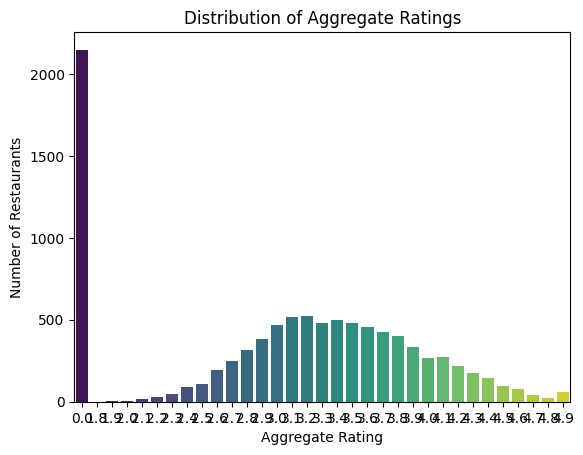

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()


In [ ]:
#identify any class imbalances.
rating_percent = (data['Aggregate rating'].value_counts(normalize=True) * 100).round(2)
print(rating_percent)


Aggregate rating
0.0    22.49
3.2     5.47
3.1     5.43
3.4     5.21
3.3     5.06
3.5     5.03
3.0     4.90
3.6     4.80
3.7     4.47
3.8     4.19
2.9     3.99
3.9     3.51
2.8     3.30
4.1     2.87
4.0     2.79
2.7     2.62
4.2     2.31
2.6     2.00
4.3     1.82
4.4     1.51
2.5     1.15
4.5     0.99
2.4     0.91
4.6     0.82
4.9     0.64
2.3     0.49
4.7     0.44
2.2     0.28
4.8     0.26
2.1     0.16
2.0     0.07
1.9     0.02
1.8     0.01
Name: proportion, dtype: float64


LEVEL 1: Task 2: Descriptive Analysis

In [ ]:
#what are the statistics of the numeric columns
data.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
#what are the statistics of the catrgorical columns
data.describe(include=['object'])

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines
count,9551,9551,9551,9551,9551,9551,9551
unique,9551,7446,141,8918,1208,1265,1825
top,5927402,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian
freq,1,83,5473,11,122,122,945


In [ ]:
# Calculate basic statistical measures (mean,median, standard deviation, etc.) for numericalcolumns.
# Get summary statistics for all numerical columns
numerical_summary = data.describe()

print(numerical_summary)

       Country Code    Longitude     Latitude  Average Cost for two  \
count   9551.000000  9551.000000  9551.000000           9551.000000   
mean      18.365616    64.126574    25.854381           1199.210763   
std       56.750546    41.467058    11.007935          16121.183073   
min        1.000000  -157.948486   -41.330428              0.000000   
25%        1.000000    77.081343    28.478713            250.000000   
50%        1.000000    77.191964    28.570469            400.000000   
75%        1.000000    77.282006    28.642758            700.000000   
max      216.000000   174.832089    55.976980         800000.000000   

       Price range  Aggregate rating         Votes  
count  9551.000000       9551.000000   9551.000000  
mean      1.804837          2.666370    156.909748  
std       0.905609          1.516378    430.169145  
min       1.000000          0.000000      0.000000  
25%       1.000000          2.500000      5.000000  
50%       2.000000          3.200000     3

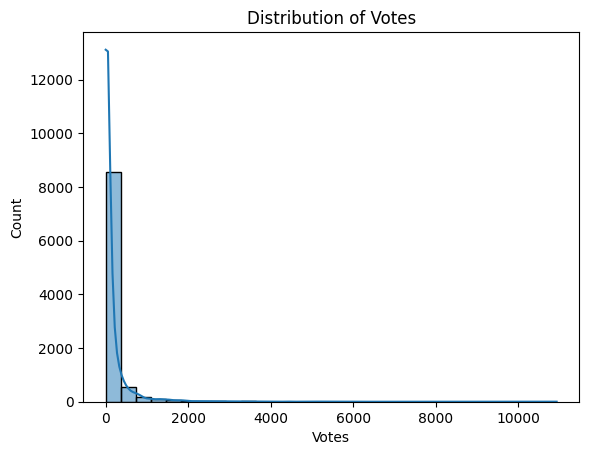

In [ ]:
sns.histplot(data['Votes'], bins=30, kde=True)
plt.title("Distribution of Votes")
plt.show()

In [ ]:
# Explore the distribution of categoricalvariables like "Country Code," "City," and"Cuisines."
# Identify the top cuisines and cities with the highest number of restaurants.

# Count of restaurants per country
country_distribution = data['Country Code'].value_counts()
print(country_distribution)

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64


In [ ]:
# Top 10 cities with most restaurants
top_cities = data['City'].value_counts().head(10)
print(top_cities)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


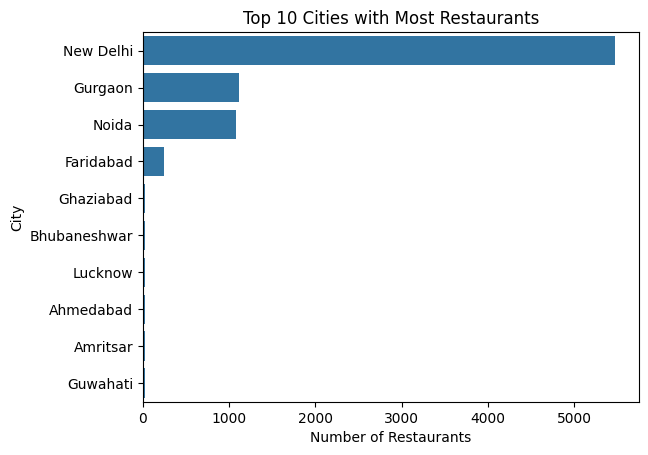

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y=top_cities.index, x=top_cities.values)
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

In [ ]:
from collections import Counter

# Combine all cuisines into one list
cuisine_series = data['Cuisines'].dropna().str.split(', ')
all_cuisines = cuisine_series.explode()

# Count frequency
top_cuisines = all_cuisines.value_counts().head(10)
print(top_cuisines)


Cuisines
North Indian    3969
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


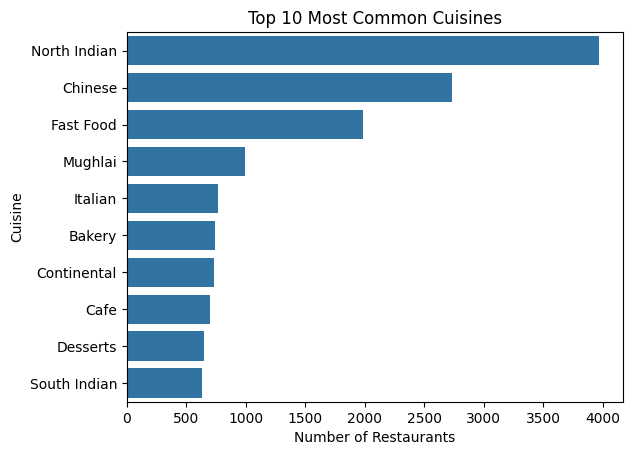

In [ ]:
sns.barplot(y=top_cuisines.index, x=top_cuisines.values)
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()


LEVEL 1: Task 3: Geospatial Analysis

In [ ]:
# Visualize the locations of restaurants on amap using latitude and longitudeinformation.
import plotly.express as px

# Create a basic scatter geo plot
fig = px.scatter_geo(data,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='Restaurant Name',
                     color='City',
                     title='Restaurant Locations Map')

fig.show()


In [ ]:
import folium

# Create a base map centered around the average coordinates
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=12)

# Add markers for each restaurant
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'],
        tooltip=row['City']
    ).add_to(m)

# Save map to an HTML file
m.save("restaurant_map.html")


In [ ]:
# Analyze the distribution of restaurantsacross different cities or countries.
# Determine if there is any correlation between the restaurant's location and its rating.

 # Restaurant Distribution
# Top 10 cities by restaurant count
city_counts = data['City'].value_counts().head(10)
print(city_counts)


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


In [ ]:
# map country codes to country names:
country_map = {
    1: 'India',
    14: 'Australia',
    30: 'Brazil',
    37: 'Canada',
    94: 'Indonesia',
    148: 'New Zealand',
    162: 'Philippines',
    166: 'Qatar',
    184: 'Singapore',
    189: 'South Africa',
    191: 'Sri Lanka',
    208: 'Turkey',
    214: 'United Arab Emirates',
    215: 'England',
    216: 'United States'
}

# Add a new column with country names
data['Country'] = data['Country Code'].map(country_map)

# Count by country
country_counts = data['Country'].value_counts().head(10)
print(country_counts)


Country
India                   8652
United States            434
England                   80
Brazil                    60
South Africa              60
United Arab Emirates      60
New Zealand               40
Turkey                    34
Australia                 24
Philippines               22
Name: count, dtype: int64


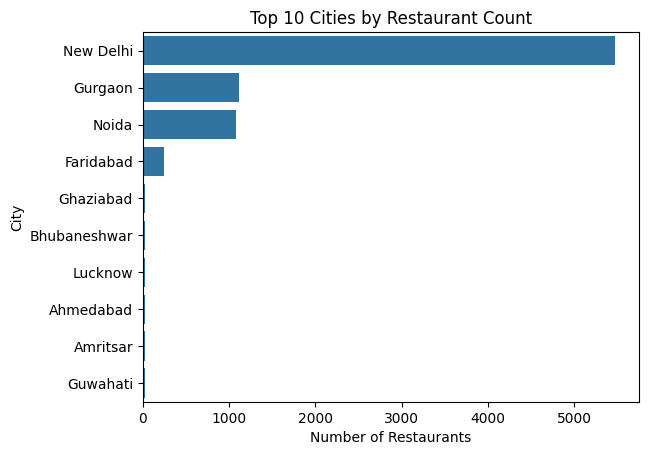

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title("Top 10 Cities by Restaurant Count")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()


In [ ]:
# Correlation Between Location and Rating
# City-wise Average Rating:
# Group by city and calculate average rating
avg_rating_by_city = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print(avg_rating_by_city)


City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64


In [ ]:
#  Country-wise Average Rating:
avg_rating_by_country = data.groupby('Country')['Aggregate rating'].mean().sort_values(ascending=False)
print(avg_rating_by_country)


Country
Philippines             4.468182
Turkey                  4.300000
Indonesia               4.295238
New Zealand             4.262500
United Arab Emirates    4.233333
South Africa            4.210000
England                 4.087500
Qatar                   4.060000
United States           4.004378
Sri Lanka               3.870000
Brazil                  3.763333
Australia               3.658333
Canada                  3.575000
Singapore               3.575000
India                   2.523324
Name: Aggregate rating, dtype: float64


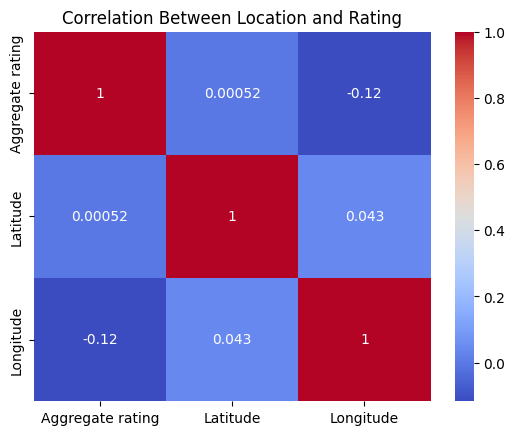

In [ ]:
# Correlation Heatmap (City ↔ Rating):
# If you're doing full correlation matrix
df_corr = data[['Aggregate rating', 'Latitude', 'Longitude']]
corr = df_corr.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Location and Rating')
plt.show()


LEVEL - 2
Task 1: Table Booking and Online Delivery

In [ ]:
# Determine the percentage of restaurants thatoffer table booking and online delivery.

# 1. Percentage Offering Table Booking
table_booking_percent = (data['Has Table booking'].value_counts(normalize=True) * 100).round(2)
print("Table Booking Percentage:\n", table_booking_percent)


Table Booking Percentage:
 Has Table booking
No     87.88
Yes    12.12
Name: proportion, dtype: float64


In [ ]:
# 2. Percentage Offering Online Delivery
online_delivery_percent = (data['Has Online delivery'].value_counts(normalize=True) * 100).round(2)
print("Online Delivery Percentage:\n", online_delivery_percent)


Online Delivery Percentage:
 Has Online delivery
No     74.34
Yes    25.66
Name: proportion, dtype: float64


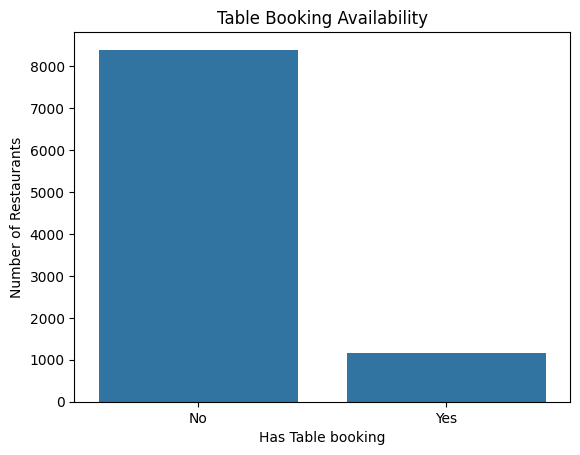

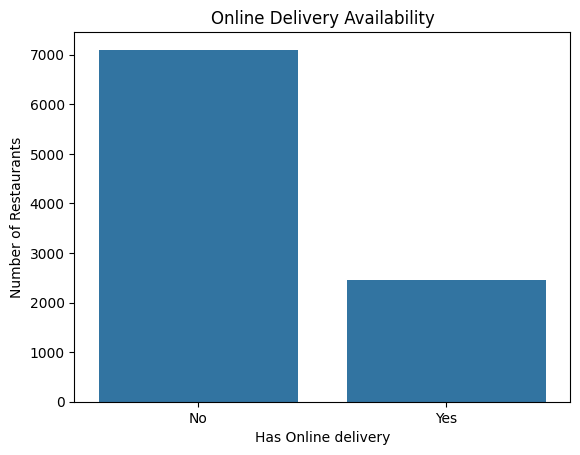

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Table Booking
sns.countplot(x='Has Table booking', data=data)
plt.title('Table Booking Availability')
plt.ylabel('Number of Restaurants')
plt.show()

# Online Delivery
sns.countplot(x='Has Online delivery', data=data)
plt.title('Online Delivery Availability')
plt.ylabel('Number of Restaurants')
plt.show()


In [ ]:
# Compare the average ratings of restaurantswith table booking and those without.
# 1. Group by Has Table booking and get average rating
avg_rating_by_table_booking = data.groupby('Has Table booking')['Aggregate rating'].mean()
print(avg_rating_by_table_booking)


Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


<ipython-input-39-a9016e95617c>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<ipython-input-40-3e05852942da>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




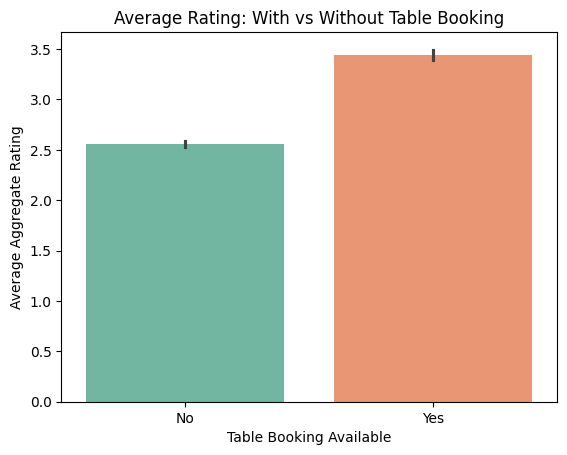

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Has Table booking', y='Aggregate rating', data=data, palette='Set2')
plt.title('Average Rating: With vs Without Table Booking')
plt.xlabel('Table Booking Available')
plt.ylabel('Average Aggregate Rating')
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Split data into two groups
with_booking = data[data['Has Table booking'] == 'Yes']['Aggregate rating']
without_booking = data[data['Has Table booking'] == 'No']['Aggregate rating']

# Run t-test
t_stat, p_value = ttest_ind(with_booking, without_booking, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 18.910847884366657, P-value: 2.4808519133657926e-78


In [ ]:
# Analyze the availability of online deliveryamong restaurants with different price ranges.

# 1. Group by Price range and calculate % with online delivery
# Normalize to get percentages
online_delivery_by_price = (
    data.groupby('Price range')['Has Online delivery']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(2)

print(online_delivery_by_price)


Has Online delivery     No    Yes
Price range                      
1                    84.23  15.77
2                    58.69  41.31
3                    70.81  29.19
4                    90.96   9.04


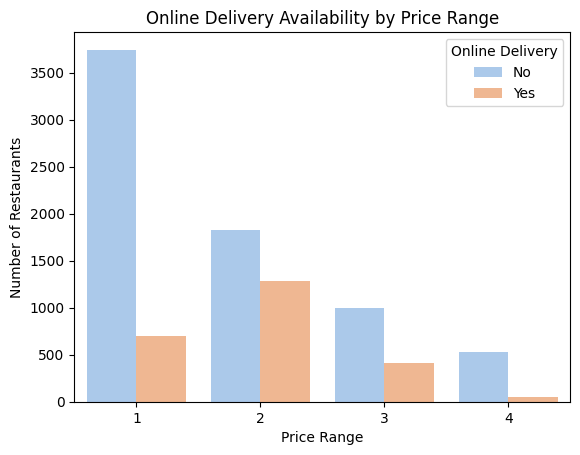

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot to show distribution
sns.countplot(x='Price range', hue='Has Online delivery', data=data, palette='pastel')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.legend(title='Online Delivery')
plt.show()


LEVEL 2: Task 2: Price Range Analysis

In [ ]:
# Determine the most common price range among all the restaurants.
# Count frequency of each price range
price_range_counts = data['Price range'].value_counts().sort_index()

# Display the most common price range
most_common_price_range = price_range_counts.idxmax()
most_common_count = price_range_counts.max()

print(f"Most common price range: {most_common_price_range} (Count: {most_common_count})")


Most common price range: 1 (Count: 4444)


<ipython-input-45-0af6a4625edd>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




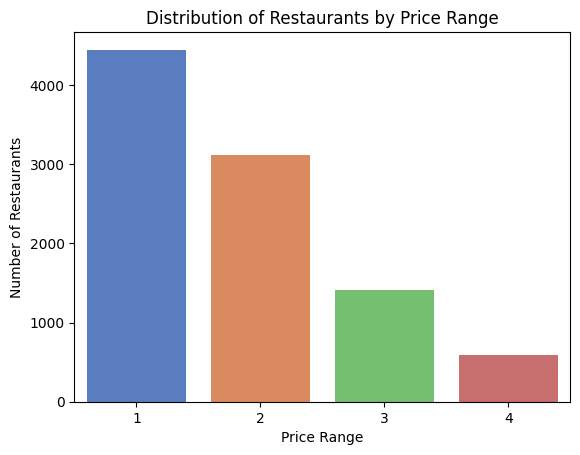

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='muted')
plt.title('Distribution of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()


In [ ]:
#Calculate the average rating for each price range.

# 1. Average Rating per Price Range
avg_rating_per_price = data.groupby('Price range')['Aggregate rating'].mean().round(2)
print("Average rating per price range:\n", avg_rating_per_price)


Average rating per price range:
 Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


In [ ]:
# 2. Identify Price Range with Highest Average Rating
highest_avg_price_range = avg_rating_per_price.idxmax()
highest_avg_rating = avg_rating_per_price.max()

print(f"Highest average rating is {highest_avg_rating} at price range {highest_avg_price_range}")


Highest average rating is 3.82 at price range 4


In [ ]:
# Identify the color that represents the highest average rating among different price ranges.
# Determine Rating Color for That Range

# Filter rows for that price range
top_range_df = data[data['Price range'] == highest_avg_price_range]

# Get the most frequent rating color in that range
top_color = top_range_df['Rating color'].mode()[0]
print(f"The color representing the highest average rating is: {top_color}")



The color representing the highest average rating is: Yellow


In [ ]:
#  Combine It All into One Table
# Group by Price range and aggregate
summary = data.groupby('Price range').agg({
    'Aggregate rating': 'mean',
    'Rating color': lambda x: x.mode()[0]  # Most common color
}).round(2)

summary = summary.rename(columns={'Aggregate rating': 'Avg Rating', 'Rating color': 'Most Common Color'})
print(summary)


             Avg Rating Most Common Color
Price range                              
1                  2.00            Orange
2                  2.94            Orange
3                  3.68            Yellow
4                  3.82            Yellow


<ipython-input-50-8bcc0a7c3e89>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




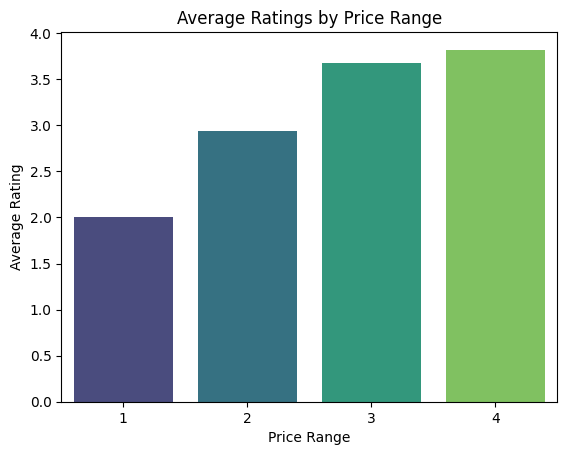

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=summary.index, y=summary['Avg Rating'], palette='viridis')
plt.title("Average Ratings by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()


LEVEL 2 : Task 3: Feature Engineering

In [ ]:
# Extract additional features from the existingcolumns, such as the length of the restaurantname or address.

# 1. Length of Restaurant Name
data['Restaurant Name Length'] = data['Restaurant Name'].str.len()


In [ ]:
# 2. Length of Address
data['Address Length'] = data['Address'].str.len()


In [ ]:
# 3. Number of Cuisines Listed
data['Cuisine Count'] = data['Cuisines'].fillna('').apply(lambda x: len(x.split(', ')))


In [ ]:
# 4. Word Count in Locality
data['Locality Word Count'] = data['Locality'].fillna('').apply(lambda x: len(x.split()))


In [ ]:
# Feature Encoding
# Encode 'Yes'/'No' to 1/0
data['Has_Table_Booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})
data['Has_Online_Delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})


In [ ]:
data[['Restaurant Name Length', 'Cuisine Count', 'Has_Table_Booking', 'Has_Online_Delivery', 'Aggregate rating']].corr()


,Restaurant Name Length,Cuisine Count,Has_Table_Booking,Has_Online_Delivery,Aggregate rating
Restaurant Name Length,1.000000,-0.039685,0.075672,-0.159614,-0.035178
Cuisine Count,-0.039685,1.000000,0.222870,0.162492,0.249394
Has_Table_Booking,0.075672,0.222870,1.000000,0.101224,0.189998
Has_Online_Delivery,-0.159614,0.162492,0.101224,1.000000,0.225699
Aggregate rating,-0.035178,0.249394,0.189998,0.225699,1.000000


LEVEL 3: Task 1: Predictive Modeling

Build a regression model to predict theaggregate rating of a restaurant based onavailable features.
Split the dataset into training and testing setsand evaluate the model's performance usingappropriate metrics.
Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance.

In [ ]:
# Predict Aggregate rating (continuous target)

# Use available numerical & encoded features

# Compare Linear Regression, Decision Tree, and Random Forest

# Evaluate with appropriate metrics: MSE, RMSE, and R²

# 1. Feature Selection & Data Preparation

features = [
    'Price range', 'Has_Table_Booking', 'Has_Online_Delivery',
    'Cuisine Count', 'Restaurant Name Length', 'Address Length'
]

# Remove unrated restaurants (rating = 0.0)
df_model = data[data['Aggregate rating'] > 0]

X = df_model[features]
y = df_model['Aggregate rating']




In [ ]:
# 2. Split into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
# 3. Train & Evaluate Multiple Models
# We’ll compare 3 models:

# Linear Regression

# Decision Tree Regressor

# Random Forest Regressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MSE': round(mse, 3),
        'RMSE': round(rmse, 3),
        'R² Score': round(r2, 3)
    })


In [ ]:
# 4. Compare Performance
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)


               Model    MSE   RMSE  R² Score
0  Linear Regression  0.254  0.504     0.177
1      Decision Tree  0.467  0.683    -0.510
2      Random Forest  0.284  0.533     0.081


LEVEL 3: Task 2: Customer Preference Analysis

Analyze the relationship between the type ofcuisine and the restaurant's rating.

Identify the most popular cuisines amongcustomers based on the number of votes.

Determine if there are any specific cuisinesthat tend to receive higher ratings.

In [ ]:
# Step 1: Prepare the Data
# Restaurants often list multiple cuisines like "Japanese, Sushi" — we need to separate them first:
# Drop missing values in Cuisines
df_cuisine = data.dropna(subset=['Cuisines']).copy()

# Split the cuisines column and explode to one cuisine per row
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].str.split(', ')
df_exploded = df_cuisine.explode('Cuisines')


In [ ]:
# Step 2: Analyze Average Ratings by Cuisine
# Group by cuisine and calculate mean rating
avg_rating_by_cuisine = df_exploded.groupby('Cuisines')['Aggregate rating'].mean().round(2).sort_values(ascending=False)

print("Top cuisines by average rating:")
print(avg_rating_by_cuisine.head(10))


Top cuisines by average rating:
Cuisines
Sunda         4.90
B�_rek        4.70
Taiwanese     4.65
Ramen         4.50
Dim Sum       4.47
Hawaiian      4.41
D�_ner        4.40
Curry         4.40
Bubble Tea    4.40
Kebab         4.38
Name: Aggregate rating, dtype: float64


In [ ]:
# Step 3: Analyze Popularity by Votes
# Group by cuisine and sum up votes
total_votes_by_cuisine = df_exploded.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

print("Most popular cuisines (by total votes):")
print(total_votes_by_cuisine.head(10))


Most popular cuisines (by total votes):
Cuisines
North Indian    598707
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64


In [ ]:
# Step 4: Combine Both – Rating + Popularity
# Combine ratings and votes into one table
cuisine_summary = df_exploded.groupby('Cuisines').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).rename(columns={
    'Aggregate rating': 'Avg Rating',
    'Votes': 'Total Votes'
}).round(2)

# Filter to only popular cuisines (optional threshold)
popular_cuisines = cuisine_summary[cuisine_summary['Total Votes'] > 100]

# Sort popular ones by average rating
top_popular_high_rating = popular_cuisines.sort_values(by='Avg Rating', ascending=False)

print("Top-rated cuisines with good popularity:")
print(top_popular_high_rating.head(10))


Top-rated cuisines with good popularity:
            Avg Rating  Total Votes
Cuisines                           
Sunda             4.90         5514
B�_rek            4.70         1305
Taiwanese         4.65          384
Ramen             4.50         1259
Dim Sum           4.47         1755
Hawaiian          4.41         8012
Curry             4.40         2059
Bubble Tea        4.40          659
Kebab             4.38         1536
Izgara            4.35         1166


<ipython-input-75-529300b9a83a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




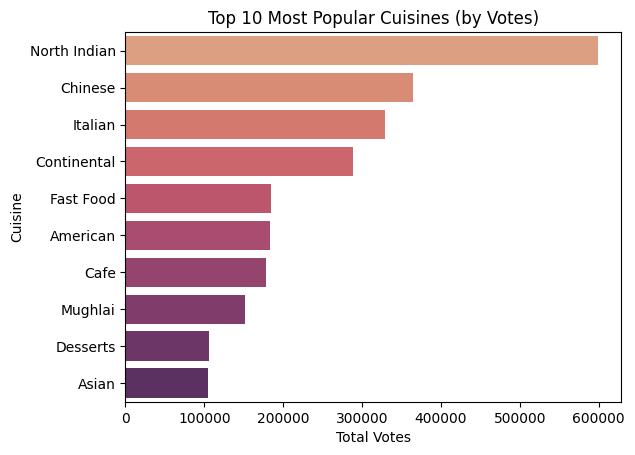

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top10_votes = total_votes_by_cuisine.head(10)
sns.barplot(y=top10_votes.index, x=top10_votes.values, palette='flare')
plt.title('Top 10 Most Popular Cuisines (by Votes)')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.show()


<ipython-input-76-20b70b770266>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




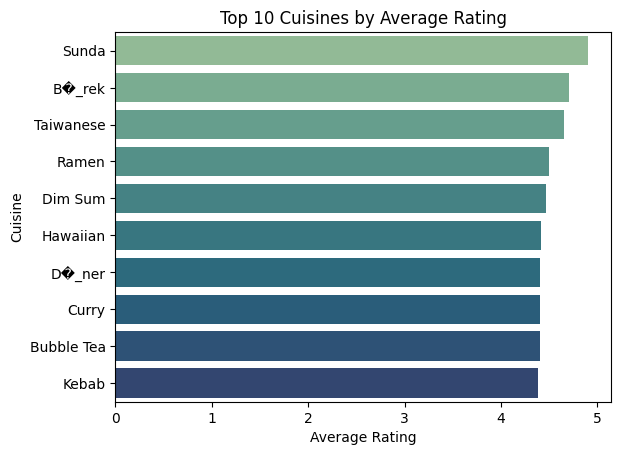

In [ ]:
# Top 10 Rated Cuisines:
top10_rated = avg_rating_by_cuisine.head(10)
sns.barplot(y=top10_rated.index, x=top10_rated.values, palette='crest')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


LEVEL 3: Task3 : Data Visualization

Create visualizations to represent the distributionof ratings using different charts (histogram, barplot, etc.).


Compare the average ratings of different cuisinesor cities using appropriate visualizations.


Visualize the relationship between variousfeatures and the target variable to gain insights.

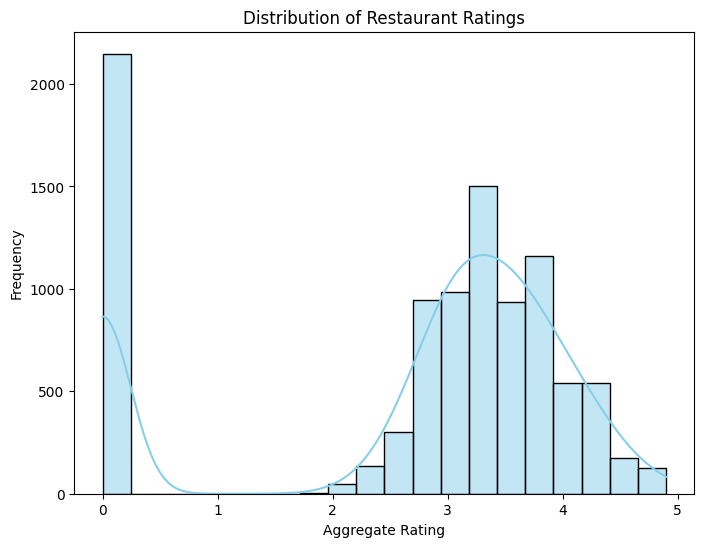

In [ ]:
# Step 1: Distribution of Ratings
# Histogram: To show how ratings are spread out.
# Box Plot: To see the distribution and detect outliers.

# create a Histogram and Box Plot to explore the distribution of restaurant ratings.
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()


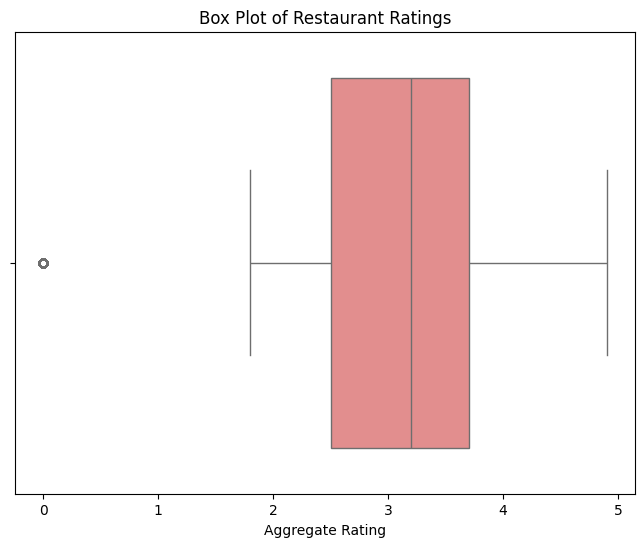

In [ ]:
# Box Plot of Ratings

# Box Plot to show distribution and outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Aggregate rating'], color='lightcoral')
plt.title('Box Plot of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.show()


<ipython-input-81-dd379d628529>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




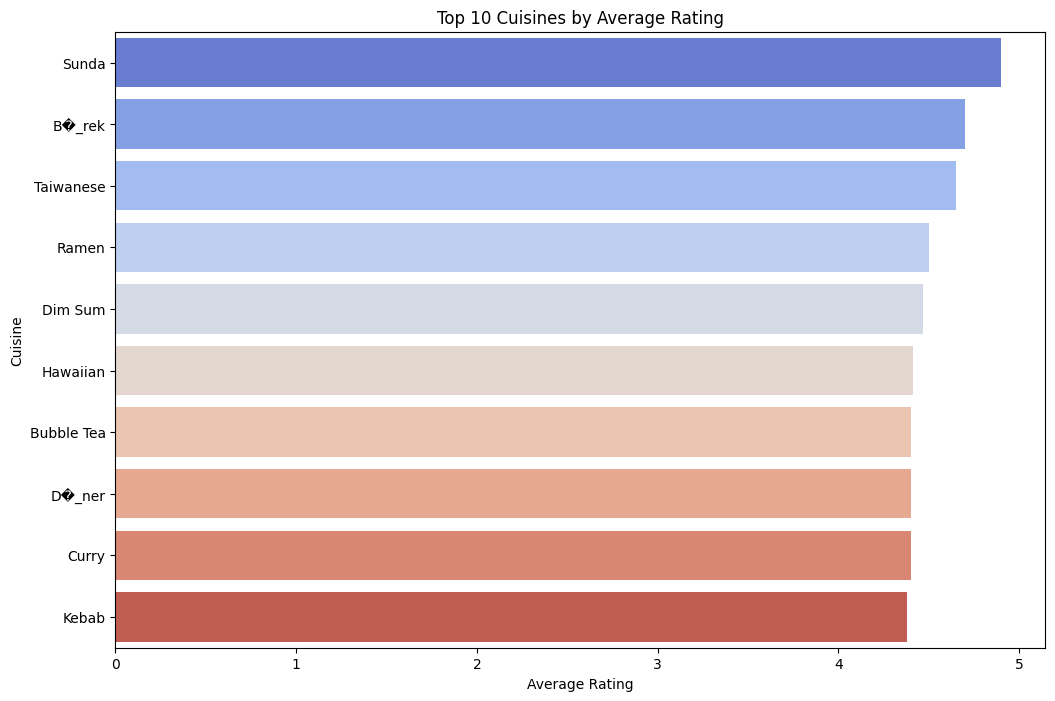

In [ ]:
# Step 2: Average Ratings by Cuisine or City

# compare the average ratings of different cuisines or cities.

# Calculate average rating by cuisine
avg_rating_by_cuisine = df_exploded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Plot average ratings for top 10 cuisines
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_by_cuisine.head(10).values, y=avg_rating_by_cuisine.head(10).index, palette='coolwarm')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


<ipython-input-83-00495c33b435>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




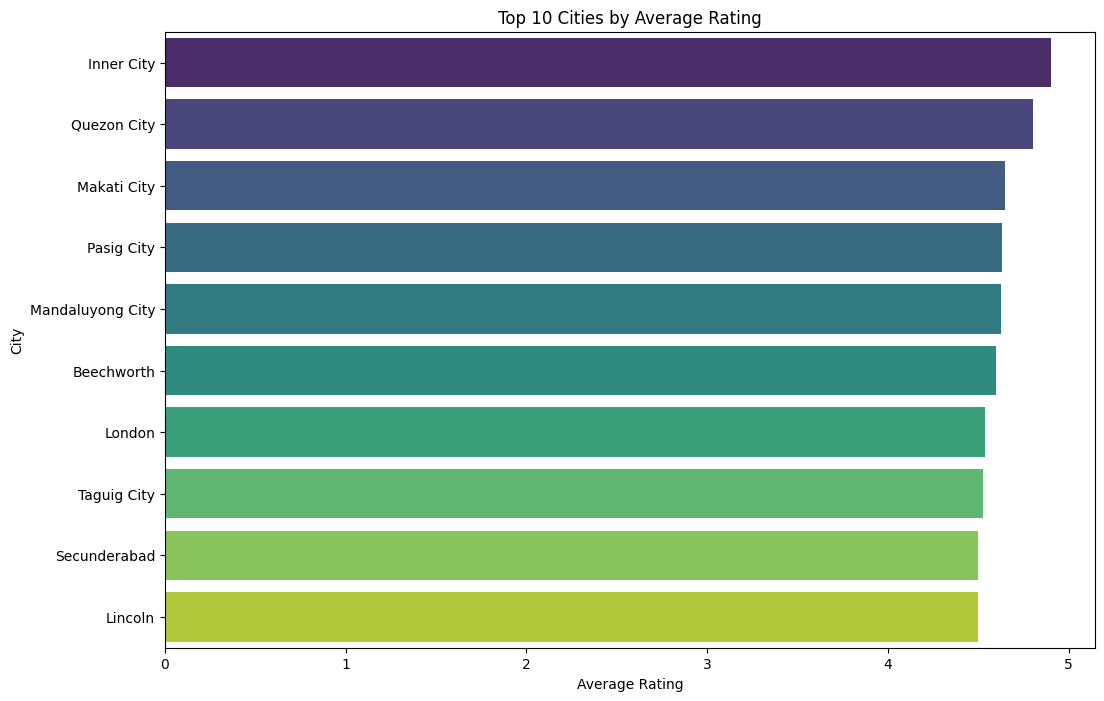

In [ ]:
# Average Ratings by City

# Calculate average rating by city
avg_rating_by_city = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Plot average ratings for top 10 cities
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_by_city.head(10).values, y=avg_rating_by_city.head(10).index, palette='viridis')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


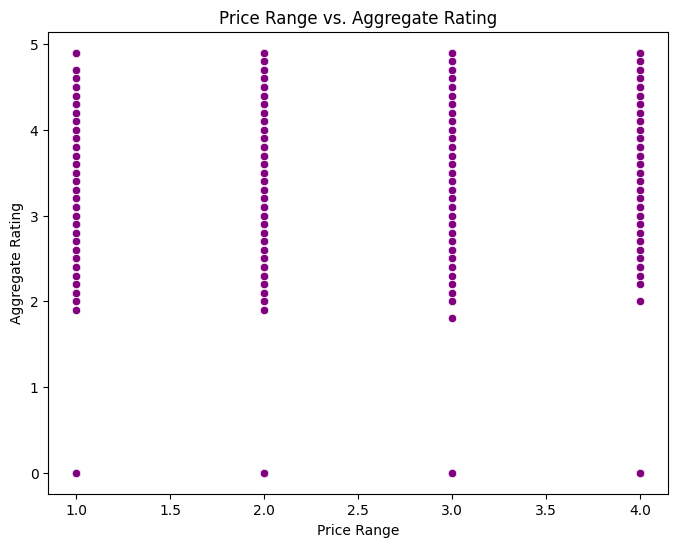

In [ ]:
# Step 3: Relationships with Target Variable (Ratings)

# Scatter Plot: Price Range vs. Ratings

# Scatter plot to show relationship between Price Range and Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Price range'], y=data['Aggregate rating'], color='purple')
plt.title('Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()


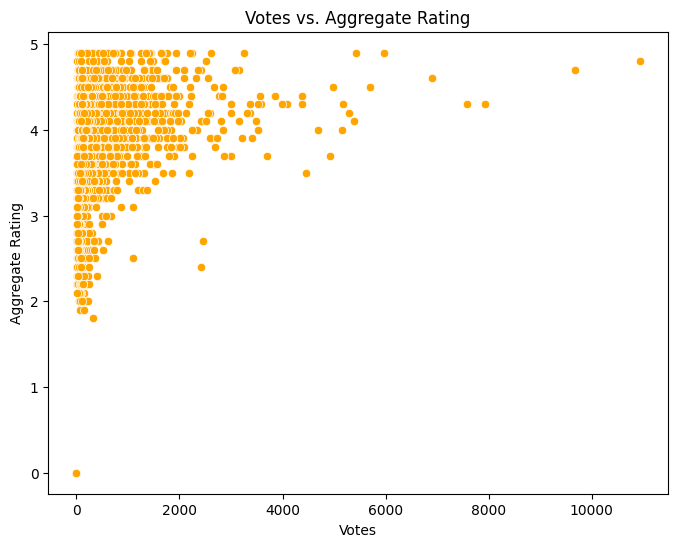

In [ ]:
# Scatter Plot: Votes vs. Ratings

# Scatter plot to show relationship between Votes and Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Votes'], y=data['Aggregate rating'], color='orange')
plt.title('Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()


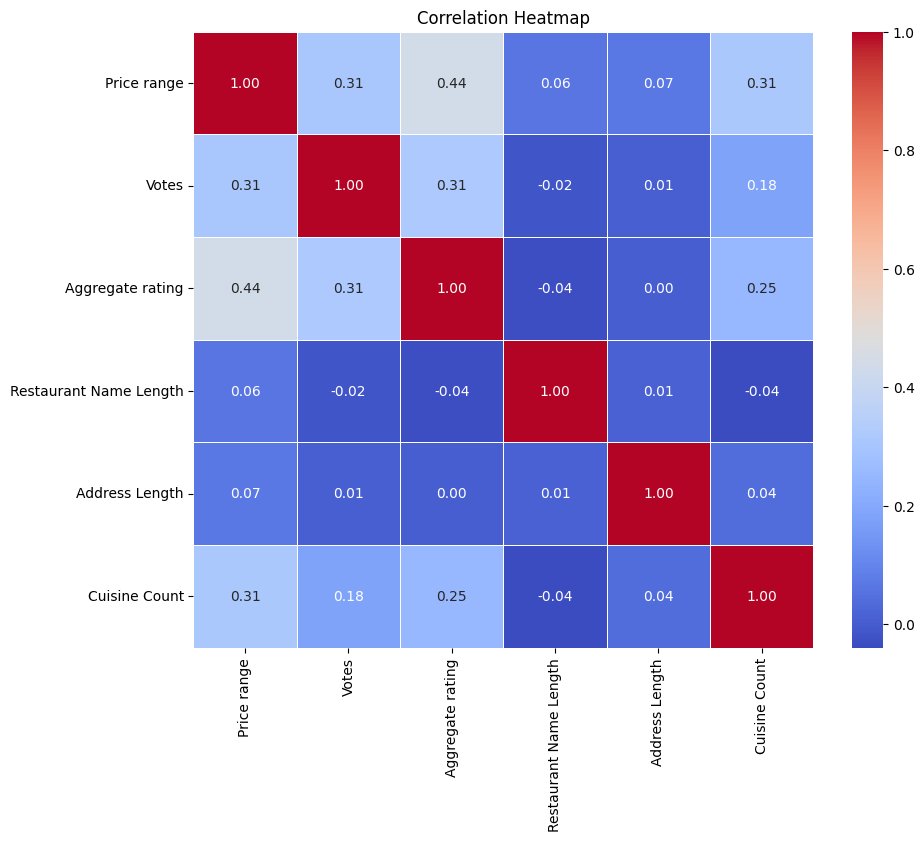

In [ ]:
# Correlation Heatmap of Features and Ratings

# Correlation matrix between numerical features
corr = data[['Price range', 'Votes', 'Aggregate rating', 'Restaurant Name Length', 'Address Length', 'Cuisine Count']].corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
